# 4장 인공지능 개론

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window 
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

In [2]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

## 퍼셉트론 (Perceptron)

In [5]:
import torch
from torch import nn
import torch.nn.functional as F

### 선형 퍼셉트론 구현

In [6]:
## 선형 퍼셉트론 구현

def perceptron(x, w, b = 0):
    if not isinstance(x, np.ndarray) or not isinstance(x, np.ndarray):
        x = np.array(x)
        w = np.array(w)
    y = np.sum(x*w) + b
    return y

x = [1, 2, 3]
w = [1, 2, 3]
# x = np.array([1, 2, 3])
# w = np.array([1, 2, 3])

y = perceptron(x, w)
print("result =", y)

result = 14


In [14]:
## 선형 퍼셉트론 구현: 랜텀 initial weights 

def perceptron(x):
    w = np.random.rand(len(x))
    b = np.random.rand()
    y = np.sum(x*w) + b
    return y, w, b

x = np.array([1, 2, 3])
w = np.array([1, 2, 3])

y, w, b = perceptron(x)
print("result =", y.round(3))
print("weight = ", w)
print("b = ", round(b, 3))


result = 4.637
weight =  [0.3302 0.9254 0.7257]
b =  0.279


### Pytorch 를 이용한 perceptron

In [ ]:
## Pytorch 를 이용한 perceptron
# torch.manual_seed(0)

input_size = 10
output_size = 1
y = nn.Linear(input_size, output_size)

print("weights = \n", y.weight)
print("bias = \n", y.bias)
print("="*50)

# 난수 생성
x = torch.rand(input_size)
print("x input = \n", x)
print("output = ", y(x))

weights = 
 Parameter containing:
tensor([[ 0.2626, -0.0651,  0.2366, -0.0510,  0.0335,  0.2863, -0.2934, -0.1991,
         -0.0801, -0.1233]], requires_grad=True)
bias = 
 Parameter containing:
tensor([0.2732], requires_grad=True)
x input = 
 tensor([0.1759, 0.2698, 0.1507, 0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263,
        0.2437])
output =  tensor([0.1770], grad_fn=<ViewBackward0>)


## 오류 순전파 (Forward propagation)

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sse(y, x):
    return (y-x)**2

def perceptron(x, w, b = 0):
    if not isinstance(x, np.ndarray) or not isinstance(x, np.ndarray):
        x = np.array(x)
        w = np.array(w)
    y = np.sum(x*w) + b
    return y

## 활성화 함수 (Activation function)

In [18]:
## 시그모이드 (sigmoid)
def activation_plot(x, y, title:str):
    plt.plot(x, y)
    plt.title(title)
    # plt.grid(linestyle = ":")
    plt.show()

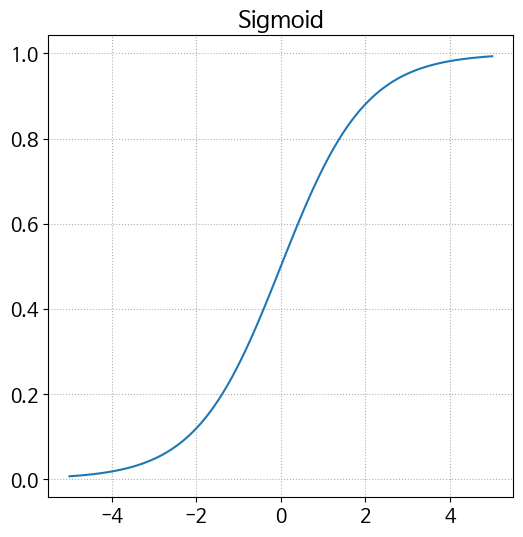

In [19]:
# numpy
x = np.linspace(-5, 5, 100)
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y
y = sigmoid(x)

# torch class
# torch_simoid = nn.Sigmoid()
# y = torch_simoid(torch.tensor(x))
# y = F.sigmoid(torch.tensor(x))

activation_plot(x, y, "Sigmoid")

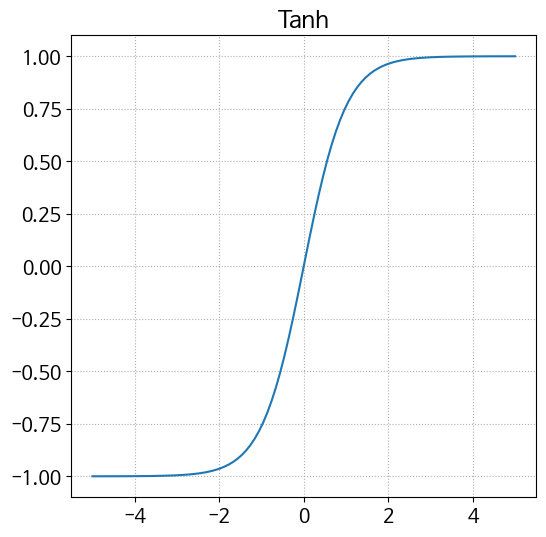

In [20]:
## Tanh (Hyperbolic Tangent)
def tanh(x):
    y = np.tanh(x)
        # y = (np.exp(x) - np.exp(-x))/ (np.exp(x) + np.exp(-x))
    return y
y = tanh(x)

# torch
torch_tanh = nn.Tanh()
y = torch_tanh(torch.tensor(x))
y = F.tanh(torch.tensor(x))

activation_plot(x, y, "Tanh")

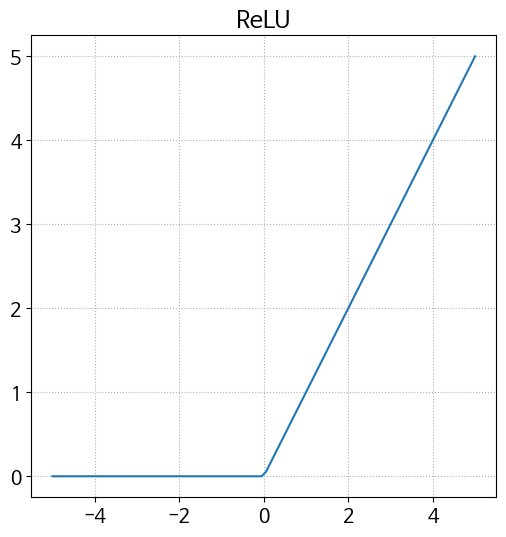

In [25]:
## ReLU (Rectified Linear Unit)
def relu(x):
    y = np.maximum(0, x)
    return y

# torch
# torch_relu = nn.ReLU()
# y = torch_relu(torch.tensor(x))
# y = F.relu(torch.tensor(x))

# y = relu(x)
activation_plot(x, y, "ReLU")

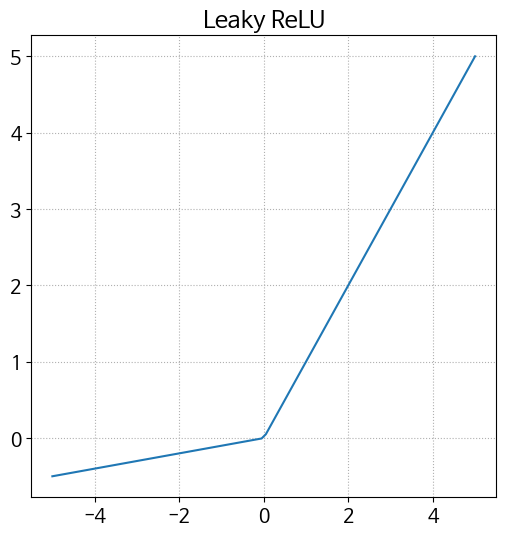

In [29]:
## Leaky ReLU
def leakyRelu(x, alpha:float):
    y = np.maximum(alpha*x, x)
    return y
y = leakyRelu(x, 0.1)

# torch
# torch_lrelu = nn.LeakyReLU(0.1)
# y = torch_lrelu(torch.tensor(x))
# y = F.leaky_relu(torch.tensor(x), 0.1)


activation_plot(x, y, "Leaky ReLU")

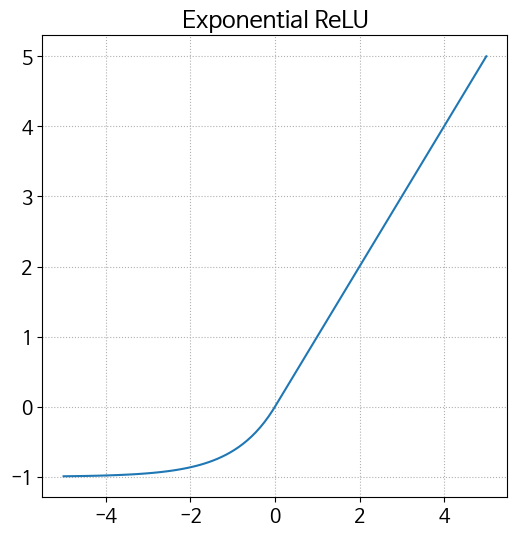

In [32]:
## Exponential ReLU
def eRelu(x, alpha):
    y = (x>0)*x + (x <= 0)*(alpha*(np.exp(x) - 1))
    return y

y = eRelu(x, 1.)

# torch
# torch_lrelu = nn.GELU(0.1)
# y = torch_lrelu(torch.tensor(x))
# y = F.leaky_relu(torch.tensor(x), 0.1)

activation_plot(x, y, "Exponential ReLU")